In [1]:
import tensorflow as tf
from keras.layers import Conv2D,MaxPool2D,SeparableConv2D,DepthwiseConv2D,MaxPooling2D,concatenate,AveragePooling2D,GlobalAveragePooling2D,Dropout,Dense,BatchNormalization,Activation,Flatten
from tensorflow.keras.layers import Conv2D,MaxPool2D,SeparableConv2D,DepthwiseConv2D,MaxPooling2D,concatenate,AveragePooling2D,GlobalAveragePooling2D,Dropout,Dense,BatchNormalization,Activation,Flatten
NUM_CLASSES=7

def DepthwiseSeparableConv2D(x, filters, kernel_size, strides, padding):
    x=SeparableConv2D(filters=filters,kernel_size=kernel_size,strides=strides,padding=padding)(x)
    x=BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def BasicConv2D(x, filters, kernel_size, strides, padding):
    x=Conv2D(filters=filters,kernel_size=kernel_size,strides=strides,padding=padding)(x)
    x=BatchNormalization()(x)
    x = Activation('relu')(x)
    return x
def inception_block_A(x):
    # Branch 1: Average Pooling -> 1x1 Conv
    branch1 = AveragePooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branch1 = BasicConv2D(branch1, filters=96,kernel_size=(1, 1),strides=1,padding="same")

    # Branch 2: 1x1 Conv
    branch2 = BasicConv2D(x,filters=96,kernel_size=(1, 1),strides=1,padding="same")

    # Branch 3: 1x1 Conv -> 3x3 Conv
    branch3 = BasicConv2D(x,filters=96,kernel_size=(3, 3),strides=1,padding="same")
    branch3 = DepthwiseSeparableConv2D(branch3, filters=96, kernel_size=(3, 3), strides=1, padding="same")

    # Branch 4: 1x1 Conv -> 3x3 Conv -> 3x3 Conv
    branch4 = BasicConv2D(x,filters=64,kernel_size=(1, 1),strides=1,padding="same")
    branch4 = DepthwiseSeparableConv2D(branch4, filters=96, kernel_size=(3, 3), strides=1, padding="same")
    branch4 = DepthwiseSeparableConv2D(branch4, filters=96, kernel_size=(3, 3), strides=1, padding="same")

    # Concatenating all the branches
    output = concatenate([branch1, branch2, branch3, branch4], axis=-1)
    return output

def inception_block_B(x):
    # Branch 1: Average Pooling -> 1x1 Conv
    branch1 = AveragePooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')
    branch1 = BasicConv2D(x,filters=128,kernel_size=(1, 1),strides=1,padding="same")

    # Branch 2: 1x1 Conv
    branch2 = BasicConv2D(x,filters=384,kernel_size=(1, 1),strides=1,padding="same")

    # Branch 3: 1x1 Conv -> 1x7 Conv -> 7x1 Conv
    branch3 = BasicConv2D(x,filters=192,kernel_size=(1, 1),strides=1,padding="same")
    branch3 = DepthwiseSeparableConv2D(branch3, filters=224, kernel_size=(1, 7), strides=1, padding="same")
    branch3 = DepthwiseSeparableConv2D(branch3,filters=256,kernel_size=(7, 1),strides=1,padding="same")

    # Branch 4: 1x1 Conv -> 7x1 Conv -> 1x7 Conv -> 7x1 Conv -> 1x7 Conv
    branch4 = BasicConv2D(x,filters=192,kernel_size=(1, 1),strides=1,padding="same")
    branch4 = DepthwiseSeparableConv2D(branch4,filters=192,kernel_size=(1, 7),strides=1,padding="same")
    branch4 = DepthwiseSeparableConv2D(branch4,filters=224,kernel_size=(7, 1),strides=1,padding="same")
    branch4 = DepthwiseSeparableConv2D(branch4,filters=224,kernel_size=(1, 7),strides=1,padding="same")
    branch4 = DepthwiseSeparableConv2D(branch4,filters=256,kernel_size=(7, 1),strides=1,padding="same")

    # Concatenating all the branches
    output = concatenate([branch1, branch2, branch3, branch4], axis=-1)
    return output

def inception_block_C(x):
    # Branch 1: Average Pooling -> 1x1 Conv
    branch1 = AveragePooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branch1 = BasicConv2D(branch1,filters=256,kernel_size=(1, 1),strides=1,padding="same")

    # Branch 2: 1x1 Conv
    branch2 = BasicConv2D(x,filters=256,kernel_size=(1, 1),strides=1,padding="same")

    # Branch 3: 1x1 Conv -> 1x3 and 3x1 Conv
    branch3 = BasicConv2D(x,filters=384,kernel_size=(1, 1),strides=1,padding="same")
    branch3a = DepthwiseSeparableConv2D(branch3,filters=256,kernel_size=(1, 3),strides=1,padding="same")
    branch3b = DepthwiseSeparableConv2D(branch3,filters=256,kernel_size=(3, 1),strides=1,padding="same")
    branch3 = concatenate([branch3a, branch3b], axis=-1)

    # Branch 4: 1x1 Conv -> 3x3 Conv -> 1x3 and 3x1 Conv
    branch4 = BasicConv2D(x,filters=384,kernel_size=(1, 1),strides=1,padding="same")
    branch4 = DepthwiseSeparableConv2D(branch4,filters=448,kernel_size=(1, 3),strides=1,padding="same")
    branch4 = DepthwiseSeparableConv2D(branch4,filters=512,kernel_size=(3, 1),strides=1,padding="same")
    branch4a = DepthwiseSeparableConv2D(branch4,filters=256,kernel_size=(3, 1),strides=1,padding="same")
    branch4b = DepthwiseSeparableConv2D(branch4,filters=256,kernel_size=(1, 3),strides=1,padding="same")
    branch4 = concatenate([branch4a, branch4b], axis=-1)

    # Concatenating all the branches
    output = concatenate([branch1, branch2, branch3, branch4], axis=-1)
    return output
def reduction_A(x):
    # Branch 1: Max Pooling
    branch1 = MaxPooling2D(3, strides=2, padding='valid')(x)

    # Branch 2: 3x3 Conv

    branch2 = BasicConv2D(x, filters=384,kernel_size=(3, 3),strides=2,padding="valid")

    # Branch 3: 1x1 Conv -> 3x3 Conv -> 3x3 Conv

    branch3 = BasicConv2D(x, filters=192,kernel_size=(1, 1),strides=1,padding="same")
    branch3 = BasicConv2D(branch3, filters=224,kernel_size=(3, 3),strides=1,padding="same")
    branch3 = BasicConv2D(branch3, filters=256,kernel_size=(3, 3),strides=2,padding="valid")

    # Concatenating all the branches
    output = concatenate([branch1, branch2, branch3], axis=-1)
    return output
def reduction_B(x):
    # Branch 1: Max Pooling
    branch1 = MaxPooling2D(3, strides=2)(x)

    # Branch 2: 1x1 Conv -> 3x3 Conv
    branch2 = BasicConv2D(x,filters=192,kernel_size=(1, 1),strides=1,padding="same")
    branch2 = BasicConv2D(branch2,filters=192,kernel_size=(3, 3),strides=2,padding="valid")

    # Branch 3: 1x1 Conv -> 1x7 Conv -> 7x1 Conv -> 3x3 Conv
    branch3 = BasicConv2D(x,filters=256,kernel_size=(1, 1),strides=1,padding="same")
    branch3 = BasicConv2D(branch3,filters=256,kernel_size=(1, 7),strides=1,padding="same")
    branch3 = BasicConv2D(branch3,filters=320,kernel_size=(7, 1),strides=1,padding="same")
    branch3 = BasicConv2D(branch3,filters=320,kernel_size=(3, 3),strides=2,padding="valid")

    # Concatenating all the branches
    output = concatenate([branch1, branch2, branch3], axis=-1)
    return output


def Stem(x):
    # Conv 3x3
    x = BasicConv2D(x,filters=32,kernel_size=(3, 3),strides=2,padding="valid")
    x = BasicConv2D(x,filters=32,kernel_size=(3, 3),strides=1,padding="valid")
    x = BasicConv2D(x,filters=64,kernel_size=(3, 3),strides=1,padding="same")

    # Max Pool and Conv
    branch1 = MaxPooling2D((3, 3), strides=2, padding='valid')(x)
    branch2 = BasicConv2D(x,filters=96,kernel_size=(3, 3),strides=2,padding="valid")
    x = concatenate([branch1, branch2], axis=-1)

    # Two parallel branches
    branch1 = BasicConv2D(x, filters=64,kernel_size=(1, 1),strides=1,padding="same")
    branch1 = BasicConv2D(branch1,filters=96,kernel_size=(3, 3),strides=1,padding="valid")

    branch2 = BasicConv2D(x, filters=64,kernel_size=(1, 1),strides=1,padding="same")
    branch2 = BasicConv2D(branch2, filters=64,kernel_size=(7, 1),strides=1,padding="same")
    branch2 = BasicConv2D(branch2,filters=64,kernel_size=(1, 7),strides=1,padding="same")
    branch2 = BasicConv2D(branch2,filters=96,kernel_size=(3, 3),strides=1,padding="valid")

    x = concatenate([branch1, branch2], axis=-1)
    branch1=BasicConv2D(x,filters=192,kernel_size=(3, 3),strides=2,padding="valid")
    branch2=MaxPool2D(pool_size=(3, 3),strides=2,padding="valid")(x)
    x=concatenate([branch1, branch2], axis=-1)


    return x
def DS_inception_Model(x):
    x=Stem(x)
    x=inception_block_A(x)
    x=reduction_A(x)
    x=inception_block_B(x)
    x=reduction_B(x)
    x=inception_block_C(x)
    x = AveragePooling2D(pool_size=(5,5))(x)
    x = Dropout(0.2)(x)
    x= Flatten()(x)
    x= Dense(NUM_CLASSES, activation='softmax')(x)
    return x

In [2]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import datetime
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Increased rotation range
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,  # Added shear transformation
    zoom_range=0.2,   # Added zoom
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_dataset = train_datagen.flow_from_directory(
    'HAM10000/train',
    target_size=(299, 299),
    batch_size=16
)

validation_dataset = valid_datagen.flow_from_directory(
    'HAM10000/val',
    target_size=(299, 299),
    batch_size=128
)

Found 8013 images belonging to 7 classes.
Found 1001 images belonging to 7 classes.


In [3]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import datetime
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from evaluation import plot_training_history,evaluate_model

# Load data
inputs=tf.keras.Input(shape=(299, 299, 3))
outputs=DS_inception_Model(inputs)
model=tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [4]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history=model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=50,
    verbose=1
)

Epoch 1/50
501/501 [==============================] - 84s 158ms/step - loss: 0.9005 - accuracy: 0.6806 - val_loss: 1.1273 - val_accuracy: 0.6643
Epoch 2/50
501/501 [==============================] - 77s 154ms/step - loss: 0.7772 - accuracy: 0.7128 - val_loss: 0.9020 - val_accuracy: 0.6573
Epoch 3/50
501/501 [==============================] - 77s 154ms/step - loss: 0.7425 - accuracy: 0.7278 - val_loss: 1.1654 - val_accuracy: 0.5924
Epoch 4/50
501/501 [==============================] - 77s 154ms/step - loss: 0.7153 - accuracy: 0.7351 - val_loss: 0.7552 - val_accuracy: 0.7223
Epoch 5/50
501/501 [==============================] - 77s 154ms/step - loss: 0.7025 - accuracy: 0.7410 - val_loss: 0.7084 - val_accuracy: 0.7433
Epoch 6/50
501/501 [==============================] - 77s 154ms/step - loss: 0.6796 - accuracy: 0.7449 - val_loss: 0.7000 - val_accuracy: 0.7323
Epoch 7/50
501/501 [==============================] - 77s 154ms/step - loss: 0.6603 - accuracy: 0.7539 - val_loss: 0.6999 - val_ac

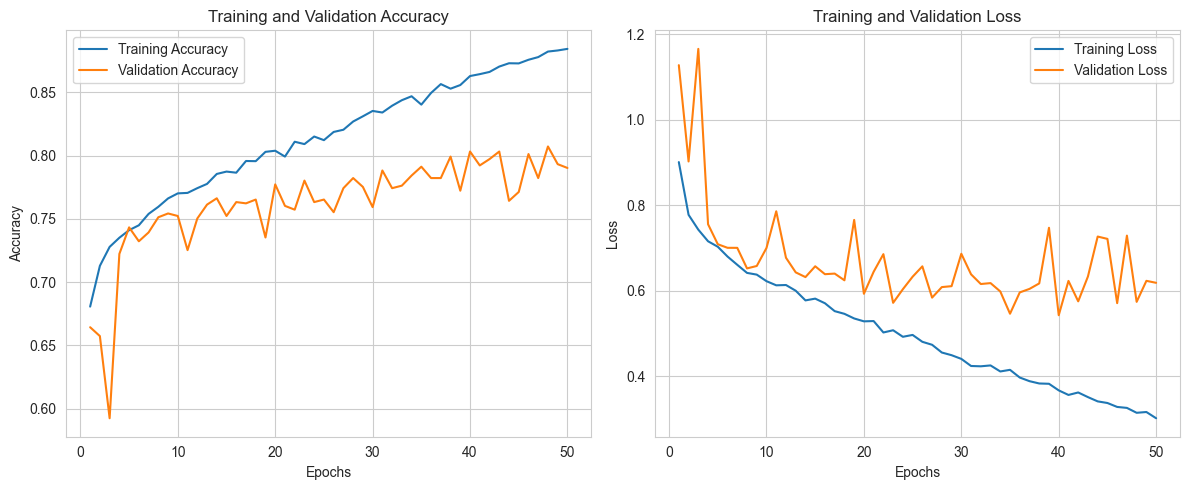

In [5]:
plot_training_history(history)

Found 1001 images belonging to 7 classes.
8/8 [==============================] - 4s 402ms/step
Confusion Matrix:
[[ 14   3   7   1   3   4   0]
 [  1  34   6   0   3   7   1]
 [  2   0  80   0   9  18   1]
 [  1   2   1   6   0   1   0]
 [  2   1  21   1  53  32   2]
 [  1   1  34   1   8 623   2]
 [  0   0   0   0   0   1  13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.44      0.53        32
           1       0.83      0.65      0.73        52
           2       0.54      0.73      0.62       110
           3       0.67      0.55      0.60        11
           4       0.70      0.47      0.56       112
           5       0.91      0.93      0.92       670
           6       0.68      0.93      0.79        14

    accuracy                           0.82      1001
   macro avg       0.71      0.67      0.68      1001
weighted avg       0.83      0.82      0.82      1001



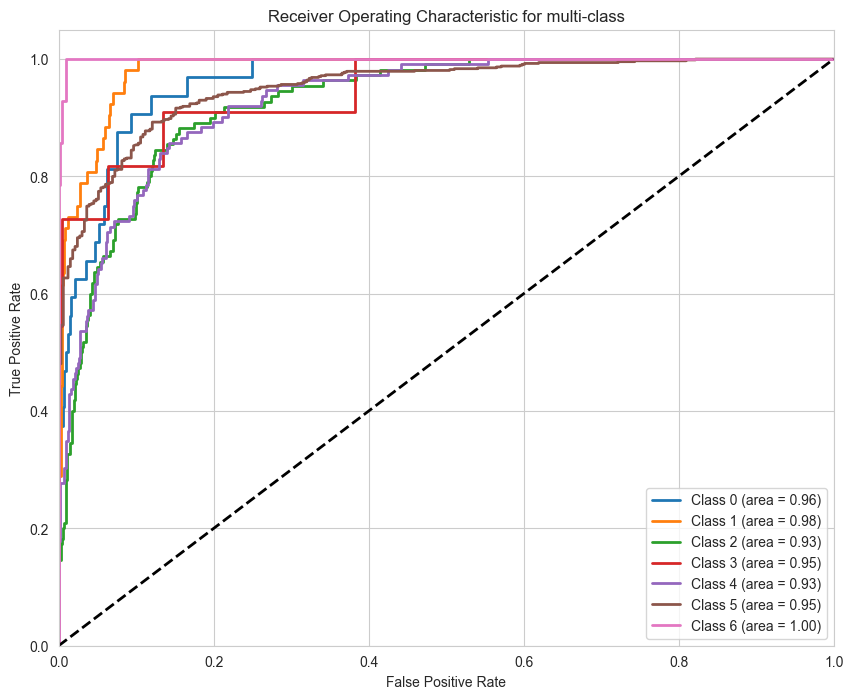

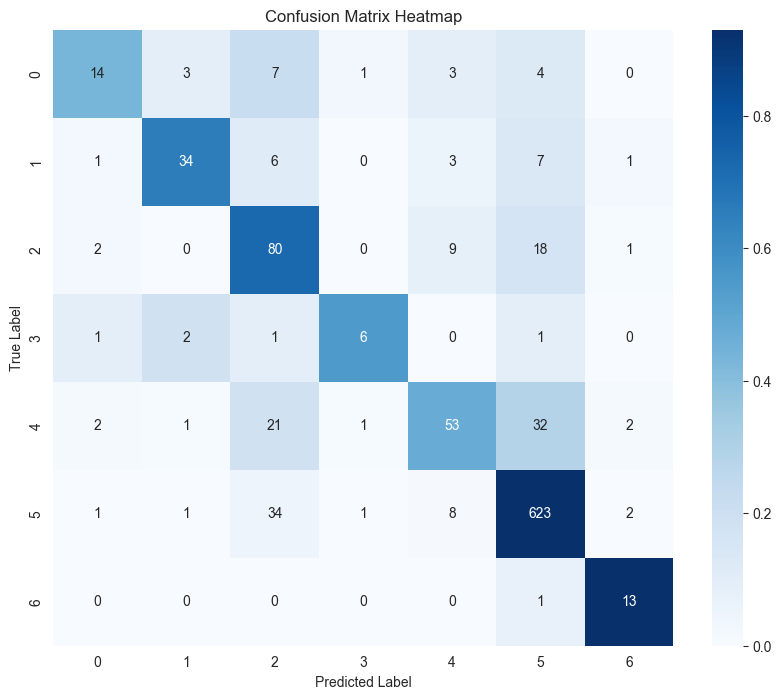

In [6]:
evaluate_model(model, 'HAM10000/test')

In [3]:
train_dataset = train_datagen.flow_from_directory(
    'HAM10000/train',
    target_size=(299, 299),
    batch_size=32
)

Found 8013 images belonging to 7 classes.


In [4]:
inputs=tf.keras.Input(shape=(299, 299, 3))
outputs=DS_inception_Model(inputs)
model=tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [5]:
from evaluation import plot_training_history,evaluate_model
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history=model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=50,
    verbose=1
)

Epoch 1/50
251/251 [==============================] - 97s 361ms/step - loss: 0.8829 - accuracy: 0.6805 - val_loss: 1.5344 - val_accuracy: 0.5215
Epoch 2/50
251/251 [==============================] - 120s 477ms/step - loss: 0.7653 - accuracy: 0.7188 - val_loss: 1.3824 - val_accuracy: 0.4995
Epoch 3/50
251/251 [==============================] - 96s 381ms/step - loss: 0.7314 - accuracy: 0.7293 - val_loss: 0.7870 - val_accuracy: 0.6903
Epoch 4/50
251/251 [==============================] - 132s 526ms/step - loss: 0.7009 - accuracy: 0.7398 - val_loss: 0.7577 - val_accuracy: 0.7153
Epoch 5/50
251/251 [==============================] - 131s 520ms/step - loss: 0.6727 - accuracy: 0.7442 - val_loss: 0.7364 - val_accuracy: 0.7143
Epoch 6/50
251/251 [==============================] - 130s 518ms/step - loss: 0.6646 - accuracy: 0.7498 - val_loss: 0.7458 - val_accuracy: 0.7283
Epoch 7/50
251/251 [==============================] - 130s 519ms/step - loss: 0.6436 - accuracy: 0.7554 - val_loss: 0.7343 - v

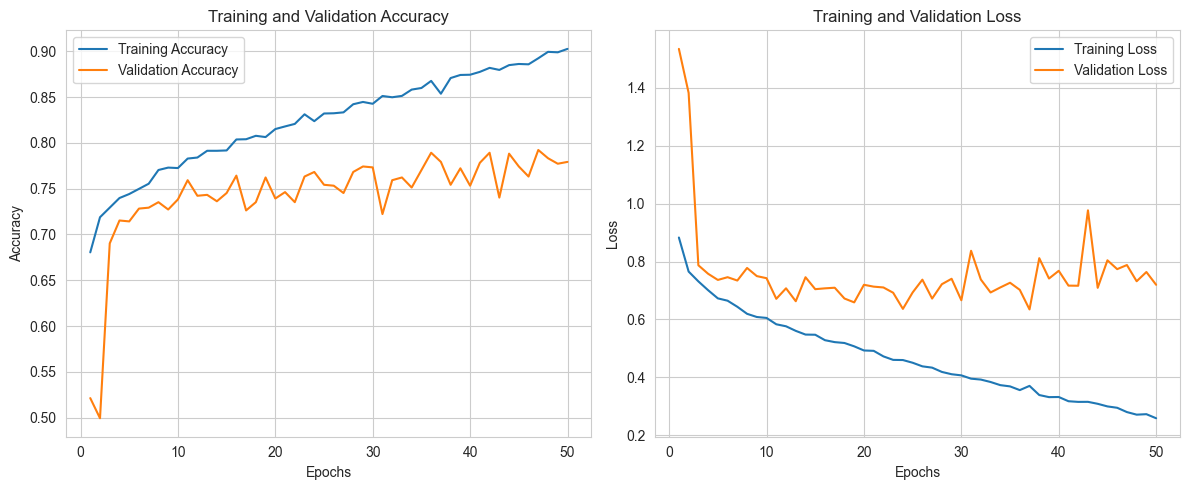

In [6]:
plot_training_history(history)

Found 1001 images belonging to 7 classes.
8/8 [==============================] - 4s 441ms/step
Confusion Matrix:
[[ 13   4   8   2   0   5   0]
 [  2  34   8   3   0   5   0]
 [  2   1  66   2   7  32   0]
 [  0   1   0   8   1   1   0]
 [  2   3  20   1  53  33   0]
 [  0   8  22   2  13 625   0]
 [  0   0   2   0   1   3   8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.41      0.51        32
           1       0.67      0.65      0.66        52
           2       0.52      0.60      0.56       110
           3       0.44      0.73      0.55        11
           4       0.71      0.47      0.57       112
           5       0.89      0.93      0.91       670
           6       1.00      0.57      0.73        14

    accuracy                           0.81      1001
   macro avg       0.70      0.62      0.64      1001
weighted avg       0.81      0.81      0.80      1001



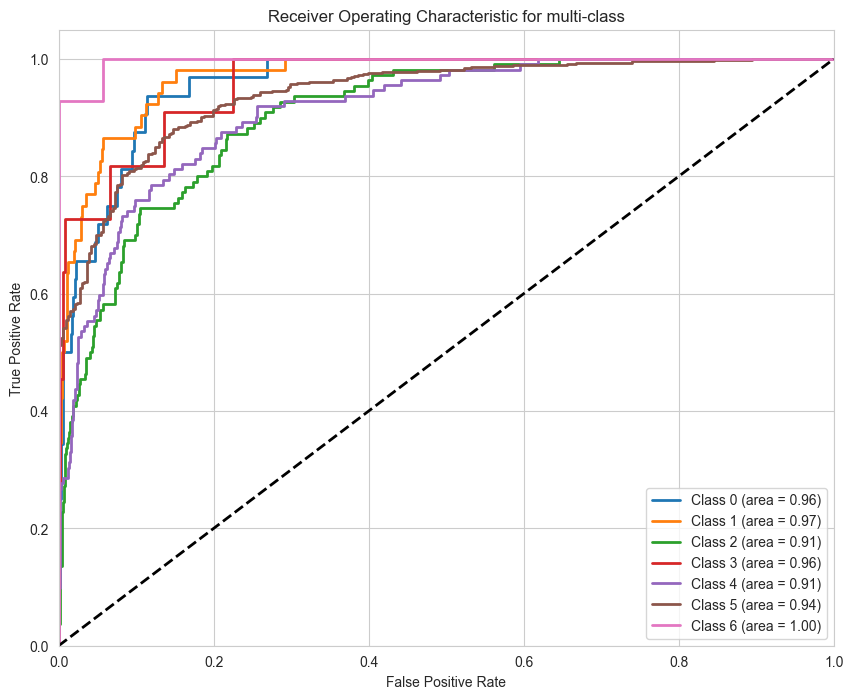

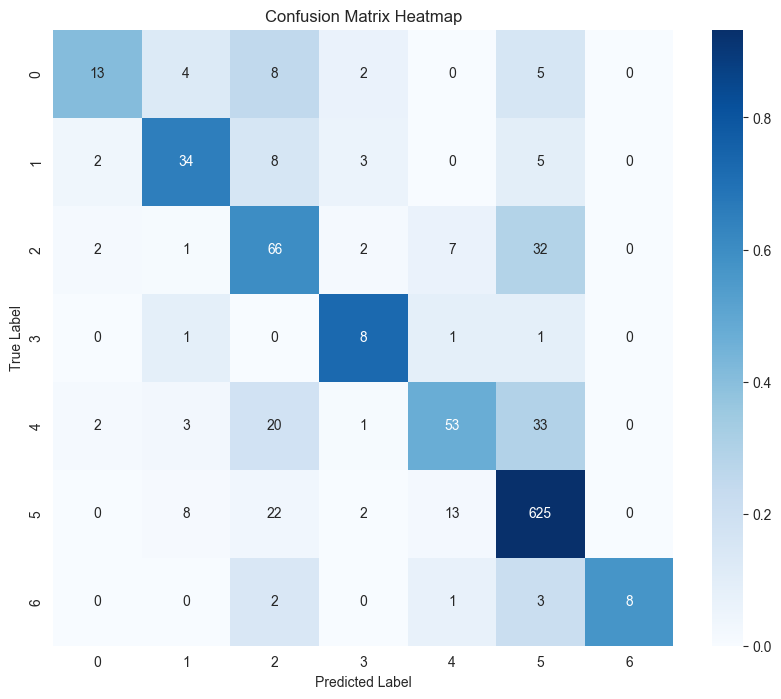

In [7]:
evaluate_model(model, 'HAM10000/test')

In [8]:
train_dataset = train_datagen.flow_from_directory(
    'HAM10000/train',
    target_size=(299, 299),
    batch_size=64
)

Found 8013 images belonging to 7 classes.


In [9]:
inputs=tf.keras.Input(shape=(299, 299, 3))
outputs=DS_inception_Model(inputs)
model=tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_33 (Conv2D)             (None, 149, 149, 32  896         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_48 (BatchN  (None, 149, 149, 32  128        ['conv2d_33[0][0]']              
 ormalization)                  )                                                           

In [10]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history=model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=50,
    verbose=1
)

Epoch 1/50
126/126 [==============================] - 78s 585ms/step - loss: 0.8737 - accuracy: 0.6884 - val_loss: 1.3665 - val_accuracy: 0.6693
Epoch 2/50
126/126 [==============================] - 73s 579ms/step - loss: 0.7563 - accuracy: 0.7188 - val_loss: 1.2787 - val_accuracy: 0.6693
Epoch 3/50
126/126 [==============================] - 74s 583ms/step - loss: 0.7227 - accuracy: 0.7293 - val_loss: 1.1793 - val_accuracy: 0.6683
Epoch 4/50
126/126 [==============================] - 73s 579ms/step - loss: 0.6716 - accuracy: 0.7514 - val_loss: 1.0700 - val_accuracy: 0.6863
Epoch 5/50
126/126 [==============================] - 74s 584ms/step - loss: 0.6623 - accuracy: 0.7505 - val_loss: 0.8942 - val_accuracy: 0.6923
Epoch 6/50
126/126 [==============================] - 74s 583ms/step - loss: 0.6525 - accuracy: 0.7548 - val_loss: 0.7505 - val_accuracy: 0.7153
Epoch 7/50
126/126 [==============================] - 73s 582ms/step - loss: 0.6272 - accuracy: 0.7668 - val_loss: 0.7177 - val_ac

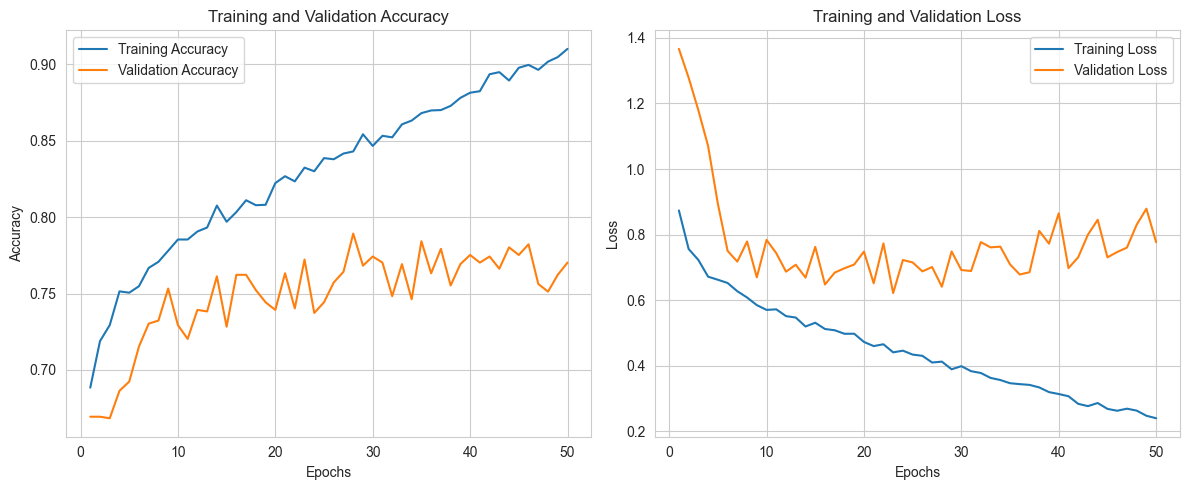

In [11]:
plot_training_history(history)

Found 1001 images belonging to 7 classes.
8/8 [==============================] - 4s 399ms/step
Confusion Matrix:
[[  9   5   8   3   4   2   1]
 [  0  38   7   1   4   2   0]
 [  2   2  64   1  22  19   0]
 [  0   2   1   6   1   1   0]
 [  0   1  21   0  64  26   0]
 [  0   2  29   0  37 600   2]
 [  0   1   0   0   0   1  12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.28      0.42        32
           1       0.75      0.73      0.74        52
           2       0.49      0.58      0.53       110
           3       0.55      0.55      0.55        11
           4       0.48      0.57      0.52       112
           5       0.92      0.90      0.91       670
           6       0.80      0.86      0.83        14

    accuracy                           0.79      1001
   macro avg       0.69      0.64      0.64      1001
weighted avg       0.81      0.79      0.79      1001



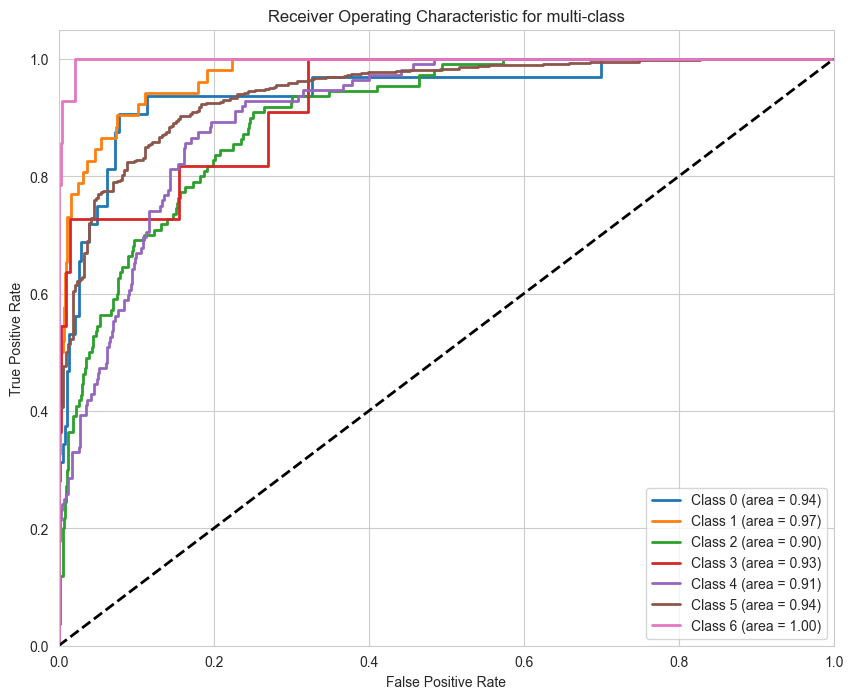

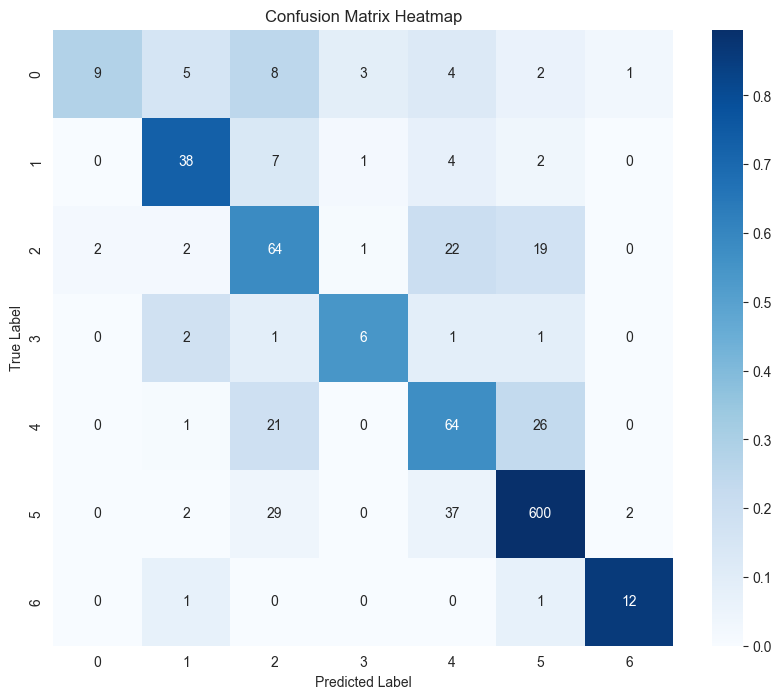

In [12]:
evaluate_model(model, 'HAM10000/test')

In [13]:
train_dataset = train_datagen.flow_from_directory(
    'HAM10000/train',
    target_size=(299, 299),
    batch_size=128
)

Found 8013 images belonging to 7 classes.


In [14]:
inputs=tf.keras.Input(shape=(299, 299, 3))
outputs=DS_inception_Model(inputs)
model=tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_66 (Conv2D)             (None, 149, 149, 32  896         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_96 (BatchN  (None, 149, 149, 32  128        ['conv2d_66[0][0]']              
 ormalization)                  )                                                           

In [15]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history=model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=50,
    verbose=1
)

Epoch 1/50
63/63 [==============================] - 81s 1s/step - loss: 0.9450 - accuracy: 0.6630 - val_loss: 1.8563 - val_accuracy: 0.1099
Epoch 2/50
63/63 [==============================] - 74s 1s/step - loss: 0.7537 - accuracy: 0.7220 - val_loss: 1.7023 - val_accuracy: 0.1099
Epoch 3/50
63/63 [==============================] - 74s 1s/step - loss: 0.7075 - accuracy: 0.7400 - val_loss: 1.5171 - val_accuracy: 0.1099
Epoch 4/50
63/63 [==============================] - 74s 1s/step - loss: 0.6770 - accuracy: 0.7484 - val_loss: 1.4116 - val_accuracy: 0.5684
Epoch 5/50
63/63 [==============================] - 74s 1s/step - loss: 0.6605 - accuracy: 0.7514 - val_loss: 1.3288 - val_accuracy: 0.6364
Epoch 6/50
63/63 [==============================] - 74s 1s/step - loss: 0.6397 - accuracy: 0.7554 - val_loss: 1.4026 - val_accuracy: 0.4376
Epoch 7/50
63/63 [==============================] - 74s 1s/step - loss: 0.6148 - accuracy: 0.7679 - val_loss: 1.6415 - val_accuracy: 0.2517
Epoch 8/50
63/63 [==

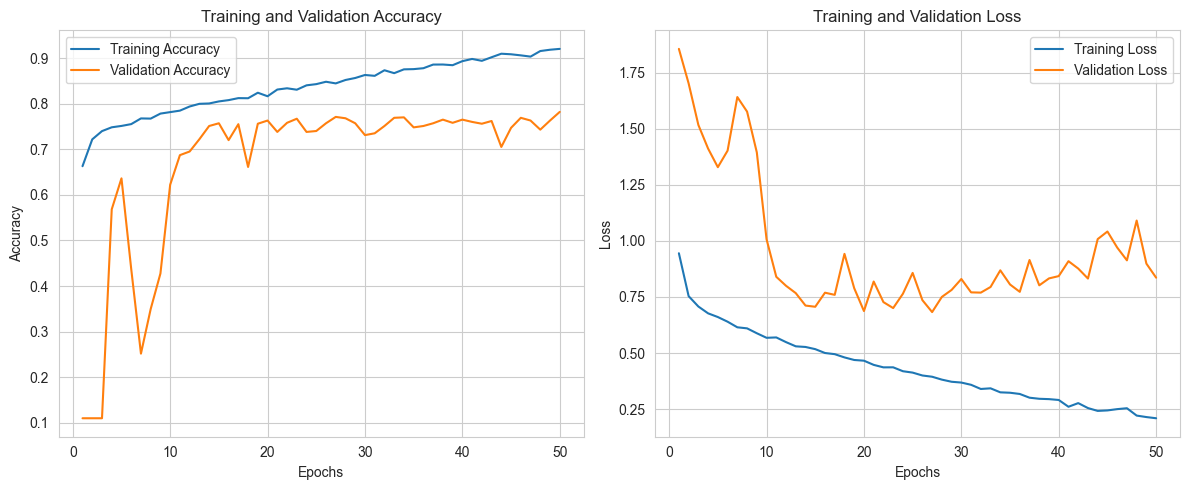

In [16]:
plot_training_history(history)

Found 1001 images belonging to 7 classes.
8/8 [==============================] - 5s 589ms/step
Confusion Matrix:
[[ 13   6   3   3   6   1   0]
 [  3  33   2   5   0   9   0]
 [  1   5  49   3  15  37   0]
 [  1   1   1   7   1   0   0]
 [  2   1  10   1  64  34   0]
 [  5   8  16   2  44 595   0]
 [  0   0   0   0   0   1  13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.41      0.46        32
           1       0.61      0.63      0.62        52
           2       0.60      0.45      0.51       110
           3       0.33      0.64      0.44        11
           4       0.49      0.57      0.53       112
           5       0.88      0.89      0.88       670
           6       1.00      0.93      0.96        14

    accuracy                           0.77      1001
   macro avg       0.63      0.64      0.63      1001
weighted avg       0.78      0.77      0.77      1001



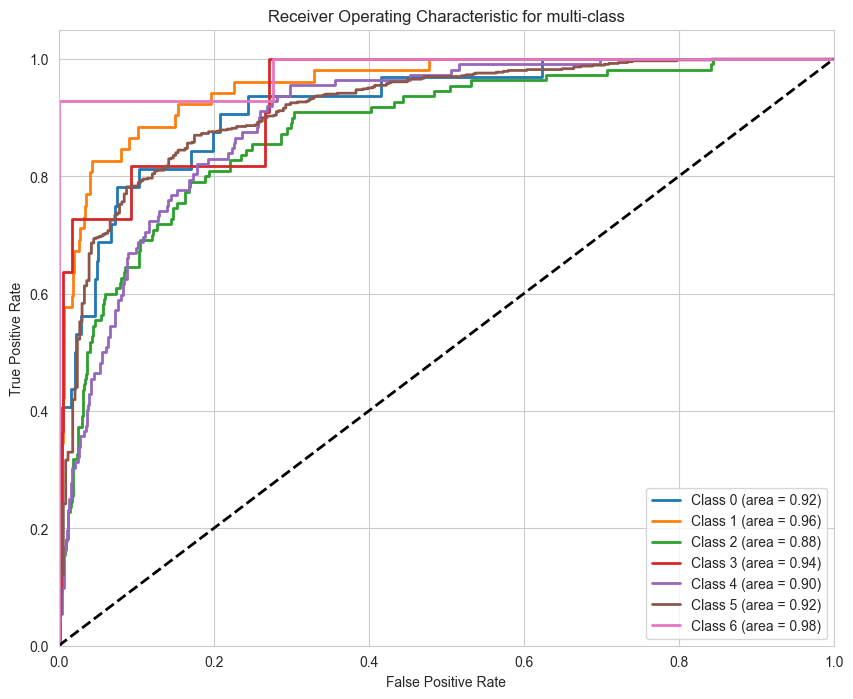

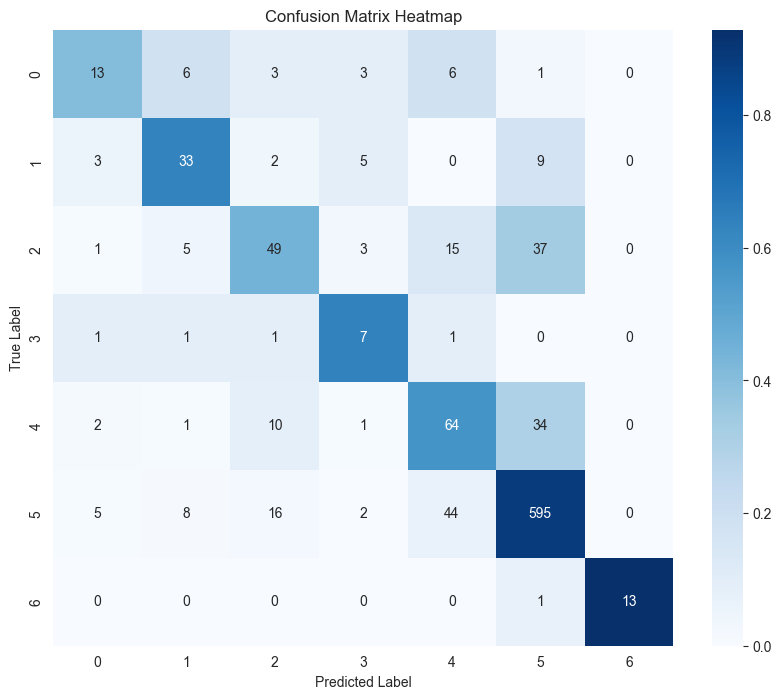

In [17]:
evaluate_model(model, 'HAM10000/test')